In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors

DATA_PATH = "E:/Dian/Class/Junior_spring/ML/cifar-10-python/cifar-10-batches-py/"

def unpack(fname):
    import pickle
    with open(fname, "rb") as fin:
        dumped = pickle.load(fin, encoding="bytes")
    return dumped

def reshape(data):
    img = np.zeros((32, 32, 3), 'uint8')
    img[..., 0] = np.reshape(data[:1024], (32, 32))
    img[..., 1] = np.reshape(data[1024:2048], (32, 32))
    img[..., 2] = np.reshape(data[2048:3072], (32, 32))
    return img

batches_meta = unpack(DATA_PATH + "batches.meta")
data_batches = [
    unpack(DATA_PATH + "data_batch_" + str(i+1))
    for i in range(5)
]
test_batch = unpack(DATA_PATH + "test_batch")

In [2]:
print(batches_meta.keys())
print(data_batches[0].keys())

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [3]:
hyperparam_train_data = data_batches[0][b"data"][:900]
hyperparam_train_labels = data_batches[0][b"labels"][:900]
hyperparam_test_data = data_batches[0][b"data"][900:1000]
hyperparam_test_labels = data_batches[0][b"labels"][900:1000]

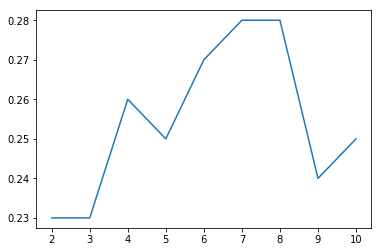

Accuracy: 0.294
Time: 0:01:46.617401 s


In [4]:
import datetime
begin = datetime.datetime.now()
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
correct_sums = []

for k in ks:
    clf = neighbors.KNeighborsClassifier(k, weights="distance")
    clf.fit(hyperparam_train_data, hyperparam_train_labels)
    
    predict = clf.predict(hyperparam_test_data)
    
    correct_sum = 0
    for i in range(len(predict)):
        if (predict[i] == hyperparam_test_labels[i]):
            correct_sum += 1
    
    correct_sums.append(correct_sum / 100.0)

plt.plot(ks, correct_sums)
plt.show()
clf = neighbors.KNeighborsClassifier(8, weights="distance")

for i in range(5):
    clf.fit(data_batches[i][b"data"], data_batches[i][b"labels"])
predict = clf.predict(test_batch[b"data"][:1000])

correct_sum = 0
for i in range(len(predict)):
    if (predict[i] == test_batch[b"labels"][i]):
        correct_sum += 1

print('Accuracy:',correct_sum / 1000.0)
end = datetime.datetime.now()
print('Time:',end - begin, 's')